In [1]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

c:\Users\rober\anaconda3\envs\ai_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('IMDB Dataset.csv')  # Adjust if filename differs
df = df.sample(1000)  # Subset for speed
print(df.head())

                                                  review sentiment
41796  Tintin and I recently aired as an episode of P...  positive
37389  While the sparkling chemistry between Ryan and...  positive
37178  Let me preface by stating that I have lived in...  negative
39358  This wonderfully witty comedy-drama wowed the ...  positive
32872  This show is freaking hilarious! the jokes are...  positive


In [4]:
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', framework='pt')  # PyTorch backend
results = classifier(df['review'].tolist()[:100], truncation=True, max_length=512)  # Batch first 100 with truncation
preds = [1 if res['label'] == 'POSITIVE' else 0 for res in results]
actual = [1 if label == 'positive' else 0 for label in df['sentiment'][:100]]
print(f"Accuracy: {accuracy_score(actual, preds):.2f}")

Device set to use cpu


Accuracy: 0.87


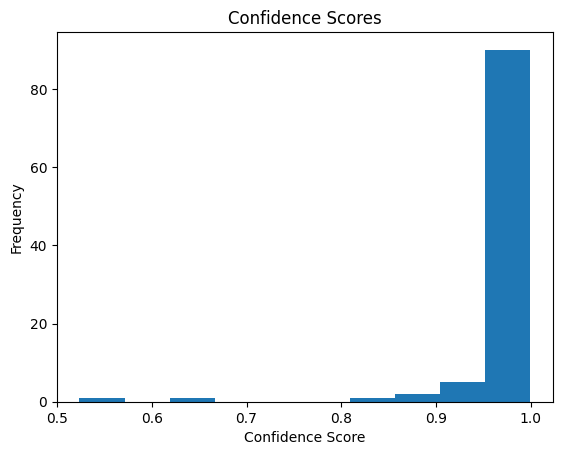

In [5]:
scores = [res['score'] for res in results]
plt.hist(scores, bins=10)
plt.title('Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Check a long review
long_review = df['review'].iloc[0]  # First review
print(f"Length: {len(long_review.split())} words")
print(classifier(long_review, truncation=True, max_length=512))

Length: 356 words
[{'label': 'POSITIVE', 'score': 0.9970241189002991}]


In [7]:
misclassified = [(text, pred, act) for text, pred, act in zip(df['review'][:100], preds, actual) if pred != act]
print(f"Misclassified count: {len(misclassified)}")
for text, pred, act in misclassified[:2]:  # Show first two
    print(f"Text: {text[:100]}... Predicted: {pred}, Actual: {act}")

Misclassified count: 13
Text: I believe there are two angles to the story, first, it's the world satyric view, presented in an obv... Predicted: 0, Actual: 1
Text: CAMILLE 2000 <br /><br />Aspect ratio: 2.35:1 (Panavision)<br /><br />Sound format: Mono<br /><br />... Predicted: 1, Actual: 0


In [8]:
test_texts = ["This movie was amazing!", "It was a terrible film."]
print(classifier(test_texts, truncation=True, max_length=512))

[{'label': 'POSITIVE', 'score': 0.9998800754547119}, {'label': 'NEGATIVE', 'score': 0.9996398687362671}]
